# Smart system for early prediction of Heart Disease

## Load Data set and libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and splitting data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# For evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv(r"C:\Users\arige\Downloads\dataset.csv")
df

## to check null and count 

In [2]:
print(df.isnull())

NameError: name 'df' is not defined

###label encoder is optional here because already the data set is converted into numerical 

In [ ]:
le = LabelEncoder()
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    df[col] = le.fit_transform(df[col])

In [ ]:
###separting output column to all other categories

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

###spliting data to train and Test 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
### implementing model

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [25]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.8360655737704918


In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [27]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm )

Confusion Matrix:
 [[24  5]
 [ 5 27]]


Text(0.5, 14.722222222222216, 'Predicted')

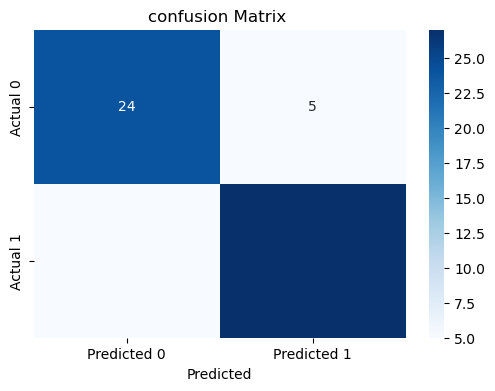

In [30]:
plt.figure(figsize=(6,4))
plt.title("confusion Matrix ")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')

###visualizes to show which category is effect more to cause diseases

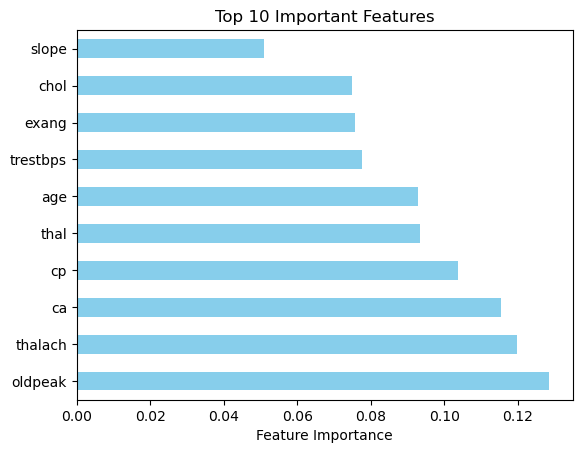

In [31]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.show()

In [33]:
for i in y_pred:
    if y_pred[i] == 1:
        print("Result:✅Heart Disease Detected")
    else:
        print(" Result:❌No Heart Disease Detected")

 Result:❌No Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
 Result:❌No Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
 Result:❌No Heart Disease Detected
 Result:❌No Heart Disease Detected
 Result:❌No Heart Disease Detected
Result:✅Heart Disease Detected
 Result:❌No Heart Disease Detected
Result:✅Heart Disease Detected
 Result:❌No Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
 Result:❌No Heart Disease Detected
 Result:❌No Heart Disease Detected
 Result:❌No Heart Disease Detected
 Result:❌No Heart Disease Detected
 Result:❌No Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
Result:✅Heart Disease Detected
 Result:❌No Heart Disease Detected
Result:✅Heart Disease Detected
 Result:❌No Heart 